<a href="https://colab.research.google.com/github/dlskawns/cp1/blob/main/2_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Text 분석

리뷰(Text) 데이터를 분석합니다.
* 리뷰(Text) 분석을 통해 키워드 및 고객 집단(cohort)분류를 위한 인사이트를 얻습니다.


### 특징 키워드 분석을 위한 Tokenizing

* 아래 BertTokenizer를 사용할 예정이지만, nltk 모듈의 함수가 다양하므로 nltk로 토큰화.
(ex: most_common, FreqDist 등)
* 몇 차례 반복하면서 TOP50 내의 단어 중 무의미한 단어들을 갖고 있다면 불용어로 처리.

In [ ]:
# EDA를 위한 불용어 사전 추가

stop_words = stopwords.words('english')
stop_words.extend(['i',
 'me','my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll",
 "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
 "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',
 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am',
 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',
 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",
 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
 "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn',
 "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
 "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", '',
 'found','s', 'br',' would', 'nt','one', 'product', 'also','amazon','much','really','time','find','tried',
  'little','used','well','make','could','even','first',
  'like','good','great','flavor','would','love','food','get','use',
  'best','buy','price','better','try','made','bought','flavors',
  'favorite','recommend','way','still','many','think','since','order',
  'bit','go','know','got','give','say','without','something','never',
  'different','easy','ca','every','makes','add','right','day','ordered','lot','always','ever',
  'perfect','however','thought','sure','years','using','definitely','work','back','people','whole',
  'see','oz','purchase','thing','excellent','happy','added','may','going','another','highly','actually',
  'nice','two','tastes','want','delicious','store','though','products','loves','enjoy','keep','put','far',
  'old','pretty','tasty','new','almost','flavored','anythiong','take','wonderful','quite','purchased',
  'usually','came','stores','year','case','tasting','trying','said','several','instead',
  'bad','looking','tasted','need','regular','getting','probably','received','seems','days','months','look',
  'kind','arrived', 'gave','maybe','least','able','absolutely','making','recommended','especially',
  'enough','less','high','per','local','buying','foods','long','anything','real','worth','feel','family',
  'last','things','us','away','amount','around','loved','wo','might','http','company','making','item','three','seeds',
  'taste','fact','href','others','prefer','wish','couple','minutes','works','seem','read','open','available','disappointed','next',
  'g','likes','everyone','difference','son','tell','glad','etc','everything','pieces','longer','others','ones',
  'eats', 'required', 'quality','looks','processed', 'appreciates','labeled','represent',
  'heaven','yummy','story','cs','selling', 'eat', 'food','good','processed', 'better'])
lemmatizer = WordNetLemmatizer()

In [ ]:
# %%time

# 토큰화 진행
tokens = []
for i in range(len(df['Text'])):
  words = word_tokenize(df['Text'][i])
  doc_token =[]

  for token in words:
    token = token.lower()
    token = re.sub(r"[^a-z ]", "", token)
    lemmatizer.lemmatize(token)
    if token not in stop_words:
      doc_token.append(token)

  tokens.append(doc_token)

df['token'] = tokens

### 품사 별 빈도가 많은 단어 추출
JJ & NN 위주 
어떤 것을 disgusting 하는지 파악

In [ ]:
# nltk.help.upenn_tagset()
pos_nn, pos_jj, pos_vbp = [],[], []
for i in vocab.most_common(200):
  a= pos_tag([i[0]])[0][1]
  if a == 'NN' or a == 'NNS':
    pos_nn.append(i)
  elif a == 'JJ':
    pos_jj.append(i)

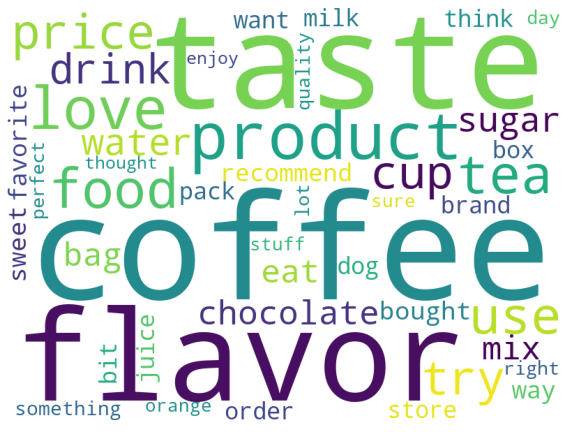

In [ ]:

# from collections import Counter
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(pos_nn))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

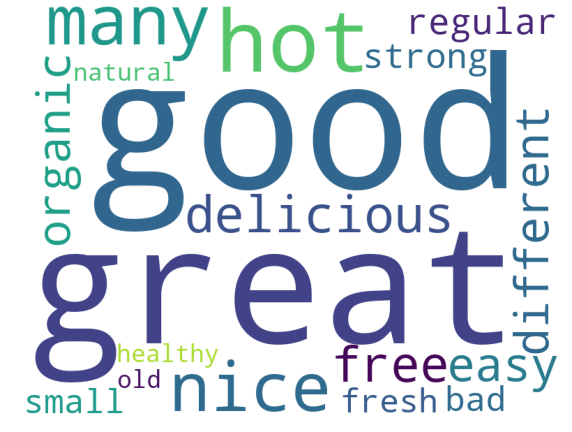

In [ ]:
wordcloud = WordCloud(background_color='white',width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(pos_jj))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### 감성 단어관련 불용어 처리 진행

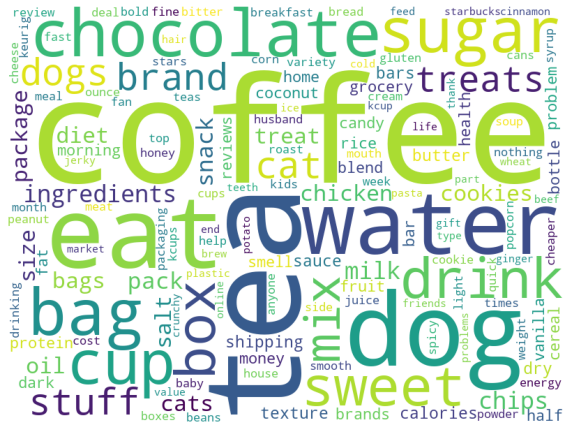

In [ ]:

# from collections import Counter
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(pos_nn))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

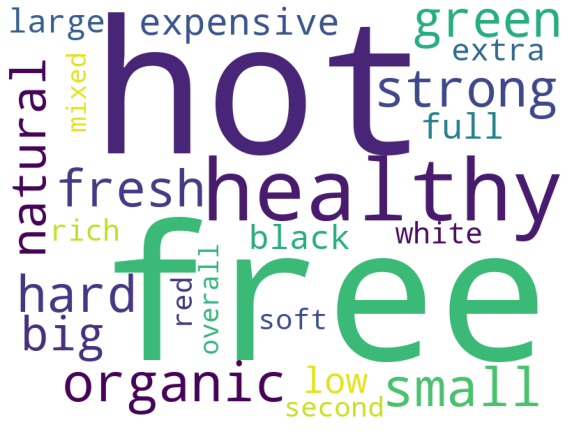

In [ ]:
wordcloud = WordCloud(background_color='white',width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(pos_jj))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### 데이터셋 total 명사 키워드 Top 50 분석

1. coffee, tea 등 drinks 관련 상품이 리뷰가 많은 것을 볼 수 있다.

2. sauce, chips, chocolate 등 상품 키워드가 존재한다.

3. dog, cat 등 반려동물용 상품이 존재하는 것을 알 수 있다.


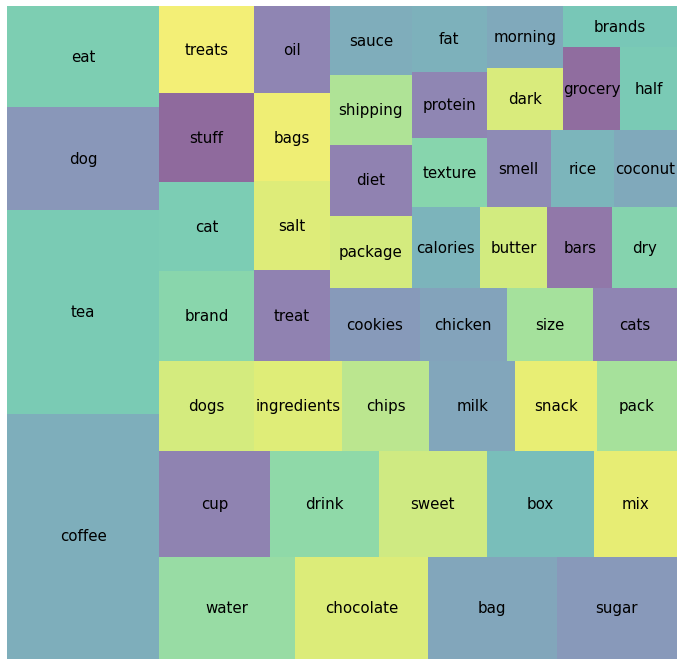

In [ ]:
import squarify
import matplotlib.pyplot as plt


plt.figure(figsize=(12,12))
plt.rc('font', size= 15);
squarify.plot(sizes=words_cnts_pos_nn['counts'], label=words_cnts_pos_nn['words'], alpha=0.6);
plt.axis('off');
plt.show();

### 데이터셋 total 형용사 키워드 Top 25 분석

1. organic, healthy, natural 등 건강기능식품에 대한 관심 및 키워드가 자주 언급되었다.

2. hard, soft, hot 등의 감각 및 지각 관련 키워드가 있음

3. free, low 및 strong, mixed 등 영양소와 관련되어 보이는 키워드가 존재


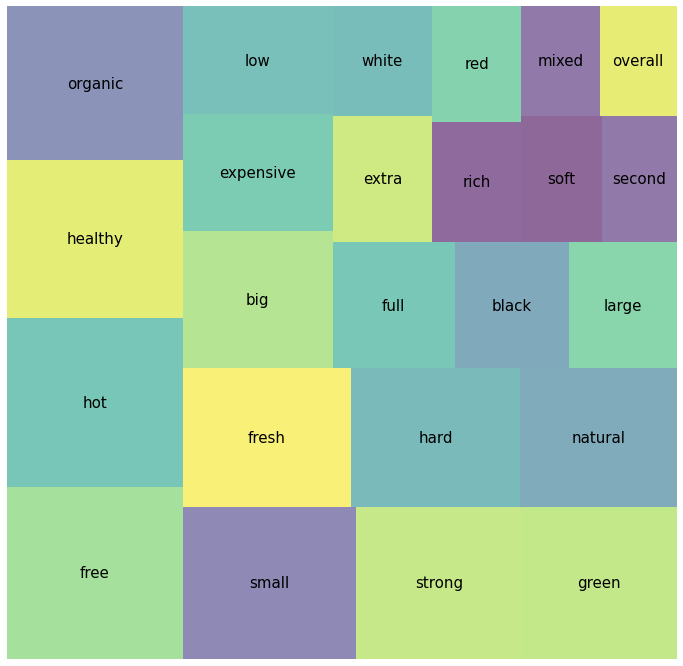

In [ ]:
plt.figure(figsize=(12,12))
plt.rc('font', size= 15);
squarify.plot(sizes=words_cnts_pos_jj['counts'], label=words_cnts_pos_jj['words'], alpha=0.6);
plt.axis('off');
plt.show();

## Text 분석 결과:

* 전반적인 불용어를 처리한 뒤, 빈도기반으로 단어(명사, 형용사)를 추출한다면 키워드 추출이 가능해 보임 -> 이를 활용해 추천시스템 매칭을 위한 특성으로 활용해볼 수 있음.
* TOP 키워드 중 DOG와 CAT이 있는 것으로 보아 반려동물 상품이 존재하는 것을 알 수 있음.
  * 반려동물 상품관련 리뷰가 전체의 10%를 차지하므로 이를 통해 고객을 세부적으로 분류하는 것을 다음의 목표로 설정하게 되었음.
